In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

# Dataset Documentation: **Mental Health Care in the Last 4 Weeks**

## Overview
This dataset provides information on mental health care services utilization in the United States during the last four weeks, segmented by various demographic and geographic factors. 
It aims to provide insights into the patterns of mental health care during a specific time period, helping researchers, policymakers, and public health officials understand the mental health care needs and service gaps.

---

#### **Columns:**

1. **Indicator**

    - **Description:** The specific mental health care measure being observed (e.g., "Received Mental Health Care").
    - **Data Type:** String
    - **Example:** "Received Counseling or Therapy"

2. **Group**

    - **Description:** The demographic or social group being studied (e.g., Age group, Gender, Income level).
    - **Data Type:** String
    - **Example:** "Adults Aged 18-29 Years"

3. **State**
   - **Description:** This column represents the U.S. state where the data was collected.
   - **Type:** Categorical (String)
   - **Examples:** "California", "Texas", "New York"

4. **Subgroup**
   - **Description:** This column identifies the demographic or population subgroup to which the data pertains (e.g., age group, race, gender).
   - **Type:** Categorical (String)
   - **Examples:** "Adults", "Children", "Women", "Men", "Hispanic", "Non-Hispanic"

5. **Phase**
   - **Description:** This column indicates the phase of data collection, often tied to specific waves of a survey or study.
   - **Type:** Categorical (String)
   - **Examples:** "Phase 1", "Phase 2", "Phase 3"

6. **Time Period**
   - **Description:** This column represents the specific time period during which the data was collected, often indicated by the week or month number within a phase.
   - **Type:** Categorical (String)
   - **Examples:** "Week 1", "Week 2", "Month 1", "Month 2"

7. **Time Period Label**
   - **Description:** This column provides a more detailed description of the time period, such as the exact dates or range of dates.
   - **Type:** Categorical (String)
   - **Examples:** "January 2023", "February 2023", "March 2023"

8. **Time Period Start Date**
   - **Description:** The start date of the time period for which the data was collected.
   - **Type:** Date (YYYY-MM-DD)
   - **Examples:** "2023-01-01", "2023-02-01"

9. **Time Period End Date**
   - **Description:** The end date of the time period for which the data was collected.
   - **Type:** Date (YYYY-MM-DD)
   - **Examples:** "2023-01-31", "2023-02-28"

10. **Value**
   - **Description:** The primary metric or value recorded for the subgroup during the specified time period, often representing the percentage or rate of individuals receiving mental health care.
   - **Type:** Numeric (Float)
   - **Examples:** 25.3, 42.1, 33.8

11. **LowCI**
   - **Description:** The lower bound of the 95% confidence interval for the `Value`. This provides a measure of the uncertainty associated with the estimate.
   - **Type:** Numeric (Float)
   - **Examples:** 23.1, 40.0, 31.5

12. **HighCI**
    - **Description:** The upper bound of the 95% confidence interval for the `Value`. This provides a measure of the uncertainty associated with the estimate.
    - **Type:** Numeric (Float)
    - **Examples:** 27.5, 44.3, 36.1

13. **Confidence Interval**
    - **Description:** This column represents the confidence interval as a string in the format "LowCI - HighCI", summarizing the range in which the true value is likely to fall.
    - **Type:** String
    - **Examples:** "23.1 - 27.5", "40.0 - 44.3", "31.5 - 36.1"

14. **Quartile Range**
    - **Description:** This column indicates the quartile range within which the data falls, representing the distribution of the data values. It may be presented as a range of values or a specific quartile.
    - **Type:** Numeric (Float, representing the mean of the range) or String (original range)
    - **Examples:** "19.0 - 22.5", "25.5 - 28.0" (String) or 20.75, 26.75 (Float)

15. **Suppression Flag**
    - **Description:** This column indicates whether the data has been suppressed due to reliability concerns or confidentiality issues. Suppressed data points are often marked to prevent misleading interpretations.
    - **Type:** Categorical (String)
    - **Examples:** "Yes", "No"

## Usage Notes
The dataset can be used to analyze trends in mental health care utilization over time, across different states, and among various demographic groups.

The data may have limitations due to self-reporting biases or data suppression to protect privacy.

It is important to consider the confidence intervals when interpreting the data, as they provide a range within which the true value is likely to fall.

## Why is the Dataset Suitable for This Task?
The dataset "Mental Health Care in the Last 4 Weeks" is well-suited for this task for several reasons:

### Relevance to Regression Analysis: 
The dataset contains numerical values that can be used as target variables for regression tasks. For example, the "Value" column, which represents the percentage of people receiving mental health care, is ideal for predicting outcomes based on different factors such as state, time period, and demographic subgroups.

### Rich Feature Set: 
The dataset includes various features like "State," "Group," "Subgroup," and "Time Period," which can serve as predictors in a regression model. These features provide a diverse set of inputs that can be analyzed to understand their impact on mental health care outcomes.

### Public Availability and Transparency: 
The dataset is publicly available, which makes it easy to access and use for academic and research purposes. It also ensures transparency in the analysis, as anyone can replicate or verify the results.

### Potential for Feature Engineering: 
The dataset has several categorical and numerical columns that allow for extensive feature engineering. New features can be created by transforming existing columns, creating interaction terms, or applying domain-specific knowledge to enhance model performance.


# Load Dataset
The survey was designed to meet the goal of accurate and timely weekly estimates. It was conducted by an internet questionnaire, with invitations to participate sent by email and text message. 

The sample frame is the Census Bureau Master Address File Data. Housing units linked to one or more email addresses or cell phone numbers were randomly selected to participate, and one respondent from each housing unit was selected to respond for him or herself. 

Estimates are weighted to adjust for nonresponse and to match Census Bureau estimates of the population by age, gender, race and ethnicity, and educational attainment. All estimates shown meet the NCHS Data Presentation Standards for Proportions.

In [5]:
df=pd.read_csv('./Downloads/Mental_Health_Care_in_the_Last_4_Weeks.csv')

### Initial exploration

In [7]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

In [9]:
df.describe()

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,9914.000000,9914.000000,9914.000000,22.0
mean,28.134948,17.450736,14.771565,20.475661,1.0
std,11.040210,8.270565,7.659396,9.052521,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.300000,8.000000,12.900000,1.0
50%,29.000000,16.200000,13.900000,19.200000,1.0
75%,37.000000,24.000000,20.800000,27.400000,1.0
max,45.000000,62.900000,53.200000,71.900000,1.0


In [10]:
df.shape

(10404, 15)

In [11]:
df.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

In [12]:
df.describe(include='all')

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
count,10404,10404,10404,10404,10404,10404.000000,10404,10404,10404,9914.000000,9914.000000,9914.000000,9914,6732,22.0
unique,4,10,52,80,8,NaN,38,38,38,NaN,NaN,NaN,7709,500,NaN
top,Took Prescription Medication for Mental Health...,By State,United States,United States,3.2,NaN,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,NaN,NaN,NaN,9.1 - 13.6,9.8-11.2,NaN
freq,2601,6732,3672,152,1920,NaN,320,320,320,NaN,NaN,NaN,8,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,28.134948,NaN,NaN,NaN,17.450736,14.771565,20.475661,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,11.040210,NaN,NaN,NaN,8.270565,7.659396,9.052521,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.400000,0.800000,2.000000,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,10.300000,8.000000,12.900000,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,16.200000,13.900000,19.200000,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,24.000000,20.800000,27.400000,NaN,NaN,1.0


In [13]:
df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')

## Handling Missing Values

In [15]:
df.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

### Use Linear Interpolation to fill in the LowCI and HighCI columns

To interpolate missing values in the LowCI and HighCI columns:

Use the .loc method,and then update the original DataFrame (df) with the interpolated values

#### # Step 1: Access the LowCI and HighCI columns using .loc

In [18]:
lowci_column = df.loc[:, 'LowCI']
highci_column = df.loc[:, 'HighCI']

### Step 2: Interpolate missing values in these columns

In [20]:
lowci_interpolated = lowci_column.interpolate(method='linear')
highci_interpolated = highci_column.interpolate(method='linear')

#### Step 3: Update the DataFrame with the interpolated values

In [22]:
df.loc[:, 'LowCI'] = lowci_interpolated
df.loc[:, 'HighCI'] = highci_interpolated
df[['LowCI', 'HighCI']].shape

(10404, 2)

##### Verify the changes

In [24]:
df[['LowCI', 'HighCI']].head()

,LowCI,HighCI
0,19.0,19.8
1,17.2,20.3
2,17.3,19.2
3,19.5,21.3
4,20.2,22.2


##### Update the filled dataset to the original dataframe

In [26]:
df.update(df[['LowCI', 'HighCI']])
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


##### Confirm the sum of the missing values

In [28]:
df.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                         0
HighCI                        0
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

### Spline Interpolation to fill in the Value Column
Use When: The data has a smooth, continuous curve, and you need a more sophisticated method than linear interpolation to estimate missing values.

In [30]:
df['Value'] = df['Value'].interpolate(method='spline', order=3)
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [31]:
df.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                         0
LowCI                         0
HighCI                        0
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

### Fill in Confidence Interval missing values using group-based imputation

calculate the mode of the Confidence Interval column beforehand, and then use it in the lambda function to fill in missing values where no mode exists within the group.

In [33]:
# Step 1: Calculate the mode of the entire 'Confidence Interval' column
mode_Confidence_interval = df['Confidence Interval'].mode()[0]

# Step 2: Print the number of missing values before imputation
print("Missing values in Confidence Interval before imputation:")
print(df['Confidence Interval'].isnull().sum())

# Step 3: Apply group-based imputation
df['Confidence Interval'] = df.groupby(['LowCI', 'HighCI'])['Confidence Interval'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else mode_Confidence_interval)
)

# Step 4: Verify that there are no missing values in the 'Confidence Interval' column
print("Missing values in Confidence Interval after imputation:")
print(df['Confidence Interval'].isnull().sum())

# Step 5: Display a few rows to check the result
df[['LowCI', 'HighCI', 'Confidence Interval']].head(10)


Missing values in Confidence Interval before imputation:
490
Missing values in Confidence Interval after imputation:
0


,LowCI,HighCI,Confidence Interval
0,19.0,19.8,19.0 - 19.8
1,17.2,20.3,17.2 - 20.3
2,17.3,19.2,17.3 - 19.2
3,19.5,21.3,19.5 - 21.3
4,20.2,22.2,20.2 - 22.2
5,18.7,20.7,18.7 - 20.7
6,17.0,19.9,17.0 - 19.9
7,11.0,17.0,11.0 - 17.0
8,13.0,14.3,13.0 - 14.3
9,24.0,25.2,24.0 - 25.2


In [34]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


### Data-Driven Imputation To fill in Quartile Range column

#### Clustering-Based Imputation: 

Group similar records using clustering techniques (e.g., K-Means), then impute missing values based on the centroid or mean of the cluster.

#### Machine Learning Models: 

Use machine learning models like Random Forests or Gradient Boosting that can handle missing data natively or predict missing values as part of a more complex pipeline.

### Convert String Ranges to Numeric Values

In [37]:
# Function to convert string ranges to their mean values
def convert_to_mean(range_str):
    try:
        if isinstance(range_str, str):
            # Replace any spaces around the hyphen with a single hyphen
            range_str = range_str.replace(' ', '')  # Remove all spaces
            low, high = map(float, range_str.split('-'))
            return (low + high) / 2
        return range_str
    except ValueError:
        return np.nan  # Return NaN if conversion to float fails

# Apply the function to the 'Quartile Range' column
df['Quartile Range'] = df['Quartile Range'].apply(convert_to_mean)


In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
predictors = df.drop(columns=['Quartile Range']).select_dtypes(include=[np.number])
target = df['Quartile Range']

rf_model.fit(predictors[target.notnull()], target.dropna())
df.loc[target.isnull(), 'Quartile Range'] = rf_model.predict(predictors[target.isnull()])

In [39]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,19.3110,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,19.1095,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,18.2795,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,19.6600,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,20.4785,NaN


In [40]:
df.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                         0
LowCI                         0
HighCI                        0
Confidence Interval           0
Quartile Range                0
Suppression Flag          10382
dtype: int64

### Fill in missing Suppression Flag based on Value

#### Define a Threshold: 

Use a threshold to determine if the value should be marked as suppressed.

#### Fill Missing Values: 

Fill in missing values based on the threshold and given rules.

In [42]:
# Define the threshold for suppression
threshold = 50

# Fill in missing Suppression Flag based on Value
df['Suppression Flag'] = df.apply(
    lambda row: 1 if (pd.isna(row['Suppression Flag']) and row['Value'] < threshold) else row['Suppression Flag'],
    axis=1
)

# Ensure all remaining NaN values are filled with 0
df['Suppression Flag'] = df['Suppression Flag'].fillna(0).astype(int)

In [43]:
df.head(30)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,19.3110,1
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,19.1095,1
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,18.2795,1
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,19.6600,1
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,20.4785,1
5,Took Prescription Medication for Mental Health...,By Age,United States,60 - 69 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.7,18.7,20.7,18.7 - 20.7,18.7745,1
6,Took Prescription Medication for Mental Health...,By Age,United States,70 - 79 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.4,17.0,19.9,17.0 - 19.9,18.3065,1
7,Took Prescription Medication for Mental Health...,By Age,United States,80 years and above,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,13.8,11.0,17.0,11.0 - 17.0,14.8645,1
8,Took Prescription Medication for Mental Health...,By Sex,United States,Male,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,13.7,13.0,14.3,13.0 - 14.3,13.8050,1
9,Took Prescription Medication for Mental Health...,By Sex,United States,Female,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,24.6,24.0,25.2,24.0 - 25.2,24.5385,1


In [44]:
df.describe()

,Time Period,Value,LowCI,HighCI,Quartile Range,Suppression Flag
count,10404.000000,10404.000000,10404.000000,10404.000000,10404.000000,10404.000000
mean,28.134948,16.686285,14.725226,20.372395,16.970673,0.998462
std,11.040210,9.575383,7.531557,8.903689,7.770710,0.039187
min,1.000000,-51.662636,0.800000,2.000000,5.900000,0.000000
25%,20.000000,10.000000,8.100000,13.000000,10.100000,1.000000
50%,29.000000,15.600000,13.808333,19.006250,15.750000,1.000000
75%,37.000000,23.800000,20.500000,27.100000,23.550000,1.000000
max,45.000000,62.900000,53.200000,71.900000,34.500000,1.000000


# Feature Engineering

## Create New Features

### Feature 1: 
Create a binary feature indicating whether the time period is during or outside a pandemic (e.g., "Pandemic_Phase").

### Rationale: 
Mental health care usage may significantly differ during a pandemic.

In [47]:
# Step 1Define the pandemic period
# Example dates: Start from March 2020 and assume it goes till the end of 2021
pandemic_start = pd.to_datetime('2020-08-19')
pandemic_end = pd.to_datetime('2022-9-5')

# Step 2: Convert the 'Time Period Start Date' column to datetime format if it's not already
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])

# Step 3: Create the 'Pandemic_Phase' binary feature
df['Pandemic_Phase'] = np.where(
    (df['Time Period Start Date'] >= pandemic_start) & (df['Time Period Start Date'] <= pandemic_end),
    1, 0)

# Step 4: Display the dataset with the new feature
df.head()

# Step 5: Save the dataset with the new feature to a new CSV file
# data.to_csv('mental_health_with_pandemic_phase.csv', index=False)

# print("Pandemic_Phase feature created and dataset saved successfully.")

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,Pandemic_Phase
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,19.3110,1,1
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,19.1095,1,1
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,18.2795,1,1
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,19.6600,1,1
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,20.4785,1,1


### Feature 2: 
Generate interaction terms between "State" and "Time Period" to capture state-specific trends over time.

### Rationale: 
Different states may have different mental health care policies that affect usage.

In [49]:
# Step 1: Convert 'Time Period' to string if it's not already
df['Time Period'] = df['Time Period'].astype(str)

# Step 2: Create the interaction term between "State" and "Time Period"
# The interaction term is typically created by combining the two categorical variables
df['State_Time_Interaction'] = df['State'] + "_" + df['Time Period']

# Step 3: Display the dataset with the new feature
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,Pandemic_Phase,State_Time_Interaction
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,19.3110,1,1,United States_13
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,19.1095,1,1,United States_13
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,18.2795,1,1,United States_13
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,19.6600,1,1,United States_13
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,20.4785,1,1,United States_13


### Feature 3: Date Range Length

##### Feature Name: Date_Range_Length

#### Description: 

Calculate the duration of each time period in days. This feature captures how long the time period spans and may help the model understand temporal changes or trends.

#### Rationale: 

Different time periods might influence the mental health care metrics differently based on their duration.

### Time_Period_Duration: 
Helps quantify the length of each time period.

In [51]:
# Convert 'Time Period Start Date' and 'Time Period End Date' to datetime
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])

# Calculate the duration in days
df['Time_Period_Duration'] = (df['Time Period End Date'] - df['Time Period Start Date']).dt.days
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,Pandemic_Phase,State_Time_Interaction,Time_Period_Duration
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,19.4,19.0,19.8,19.0 - 19.8,19.3110,1,1,United States_13,12
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,18.7,17.2,20.3,17.2 - 20.3,19.1095,1,1,United States_13,12
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,18.3,17.3,19.2,17.3 - 19.2,18.2795,1,1,United States_13,12
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,20.4,19.5,21.3,19.5 - 21.3,19.6600,1,1,United States_13,12
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,21.2,20.2,22.2,20.2 - 22.2,20.4785,1,1,United States_13,12


### Feature 4: Value to CI Ratio
##### Feature Name: Value_to_CI_Ratio

##### Description: 

This feature represents the ratio of the Value to the Confidence Interval (CI). You could use the HighCI or LowCI depending on which provides more insight.

#### Rationale: 

The ratio might help the model understand how the Value compares to the CI, which could be relevant for detecting anomalies or variations in mental health care.

#### Value_to_HighCI_Ratio and Value_to_LowCI_Ratio help understand the Value relative to the confidence interval.

In [53]:
df['Value_to_HighCI_Ratio'] = df['Value'] / df['HighCI']
df['Value_to_LowCI_Ratio'] = df['Value'] / df['LowCI']
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,Pandemic_Phase,State_Time_Interaction,Time_Period_Duration,Value_to_HighCI_Ratio,Value_to_LowCI_Ratio
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,19.4,19.0,19.8,19.0 - 19.8,19.3110,1,1,United States_13,12,0.979798,1.021053
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,18.7,17.2,20.3,17.2 - 20.3,19.1095,1,1,United States_13,12,0.921182,1.087209
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,18.3,17.3,19.2,17.3 - 19.2,18.2795,1,1,United States_13,12,0.953125,1.057803
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,20.4,19.5,21.3,19.5 - 21.3,19.6600,1,1,United States_13,12,0.957746,1.046154
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,21.2,20.2,22.2,20.2 - 22.2,20.4785,1,1,United States_13,12,0.954955,1.049505


## Interactions and Transformations:

### Logarithmic Transformations: 

Consider logarithmic transformations for highly skewed numerical features.

Transformations:

Consider logarithmic transformations for highly skewed numerical features.
Encode categorical variables using one-hot encoding or label encoding as needed.

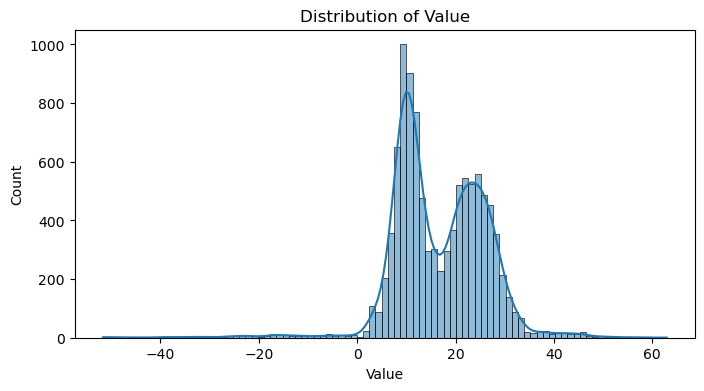

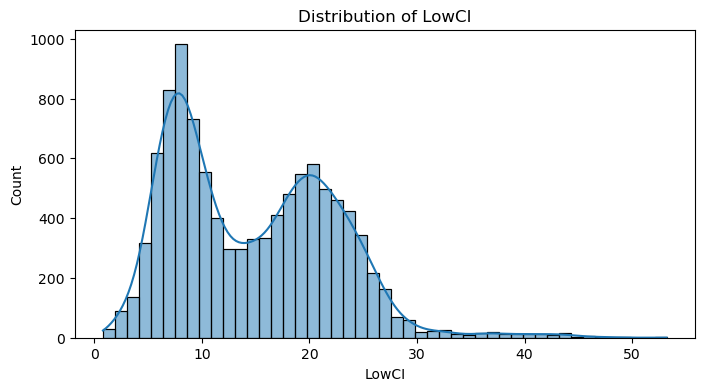

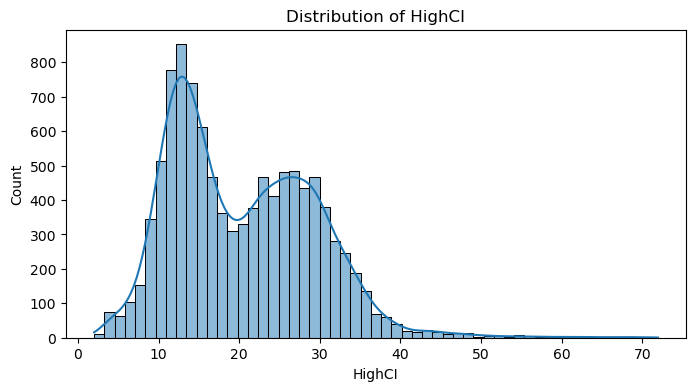

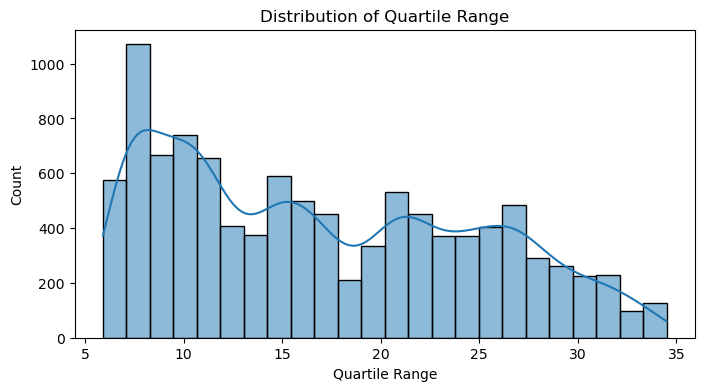

In [56]:
# Step 1: Identify highly skewed numerical features
# Plot the distribution of numerical features to assess skewness
numerical_features = ['Value', 'LowCI', 'HighCI', 'Quartile Range']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [57]:
# Step 2: Apply logarithmic transformations to highly skewed features
# Replace negative or NaN values with a small positive number (e.g., 0.01)
df['Value'] = df['Value'].clip(lower=0.01)
df['LowCI'] = df['LowCI'].clip(lower=0.01)
df['HighCI'] = df['HighCI'].clip(lower=0.01)

# 'Value', 'LowCI' and 'HighCI' are highly skewed based on visual inspection
df['Log_Value'] = np.log1p(df['Value'])  # log1p is used to handle zero values
df['Log_LowCI'] = np.log1p(df['LowCI'])
df['HighCI'] = np.log1p(df['HighCI'])

### Categorical Encoding:

### One-Hot Encoding: 

Convert categorical variables like State, Subgroup, or Phase into numerical format using one-hot encoding to use them effectively in machine learning models.

In [59]:
# Step 3: Encode categorical variables using one-hot encoding
# Identify categorical columns
categorical_features = ['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period', 'Time Period Label']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df = pd.concat([df, df_encoded], axis=1)
df_encoded.head()

,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,Pandemic_Phase,State_Time_Interaction,...,"Time Period Label_Nov 25 - Dec 7, 2020","Time Period Label_Oct 12 - Nov 30, 2021","Time Period Label_Oct 14 - Oct 26, 2020","Time Period Label_Oct 28 - Nov 9, 2020","Time Period Label_Sep 1 - Sep 13, 2021","Time Period Label_Sep 15 - Sep 27, 2021","Time Period Label_Sep 16 - Sep 28, 2020","Time Period Label_Sep 2 - Sep 14, 2020","Time Period Label_Sep 29 - Oct 11, 2021","Time Period Label_Sep 30 - Oct 12, 2020"
0,2020-08-19,2020-08-31,19.4,19.0,3.034953,19.0 - 19.8,19.3110,1,1,United States_13,...,False,False,False,False,False,False,False,False,False,False
1,2020-08-19,2020-08-31,18.7,17.2,3.058707,17.2 - 20.3,19.1095,1,1,United States_13,...,False,False,False,False,False,False,False,False,False,False
2,2020-08-19,2020-08-31,18.3,17.3,3.005683,17.3 - 19.2,18.2795,1,1,United States_13,...,False,False,False,False,False,False,False,False,False,False
3,2020-08-19,2020-08-31,20.4,19.5,3.104587,19.5 - 21.3,19.6600,1,1,United States_13,...,False,False,False,False,False,False,False,False,False,False
4,2020-08-19,2020-08-31,21.2,20.2,3.144152,20.2 - 22.2,20.4785,1,1,United States_13,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,...,"Time Period Label_Nov 25 - Dec 7, 2020","Time Period Label_Oct 12 - Nov 30, 2021","Time Period Label_Oct 14 - Oct 26, 2020","Time Period Label_Oct 28 - Nov 9, 2020","Time Period Label_Sep 1 - Sep 13, 2021","Time Period Label_Sep 15 - Sep 27, 2021","Time Period Label_Sep 16 - Sep 28, 2020","Time Period Label_Sep 2 - Sep 14, 2020","Time Period Label_Sep 29 - Oct 11, 2021","Time Period Label_Sep 30 - Oct 12, 2020"
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,19.4,...,False,False,False,False,False,False,False,False,False,False
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,18.7,...,False,False,False,False,False,False,False,False,False,False
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,18.3,...,False,False,False,False,False,False,False,False,False,False
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,20.4,...,False,False,False,False,False,False,False,False,False,False
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,21.2,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df.isnull().sum()

Indicator                                  0
Group                                      0
State                                      0
Subgroup                                   0
Phase                                      0
                                          ..
Time Period Label_Sep 15 - Sep 27, 2021    0
Time Period Label_Sep 16 - Sep 28, 2020    0
Time Period Label_Sep 2 - Sep 14, 2020     0
Time Period Label_Sep 29 - Oct 11, 2021    0
Time Period Label_Sep 30 - Oct 12, 2020    0
Length: 256, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Columns: 256 entries, Indicator to Time Period Label_Sep 30 - Oct 12, 2020
dtypes: bool(219), datetime64[ns](4), float64(16), int32(4), int64(2), object(11)
memory usage: 5.0+ MB


In [63]:
df.describe()

,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Quartile Range,Suppression Flag,Pandemic_Phase,Time_Period_Duration,Value_to_HighCI_Ratio,...,LowCI,HighCI,Quartile Range,Suppression Flag,Pandemic_Phase,Time_Period_Duration,Value_to_HighCI_Ratio,Value_to_LowCI_Ratio,Log_Value,Log_LowCI
count,10404,10404,10404.000000,10404.000000,10404.000000,10404.000000,10404.000000,10404.0,10404.000000,10404.000000,...,10404.000000,10404.000000,10404.000000,10404.000000,10404.0,10404.000000,10404.000000,10404.000000,10404.000000,10404.000000
mean,2021-05-19 17:16:24.083044864,2021-06-01 00:43:11.003460352,16.999120,14.725226,2.971373,16.970673,0.998462,1.0,12.310265,0.803102,...,14.725226,2.971373,16.970673,0.998462,1.0,12.310265,0.803102,1.169533,2.747437,2.631009
min,2020-08-19 00:00:00,2020-08-31 00:00:00,0.010000,0.800000,1.098612,5.900000,0.000000,1.0,6.000000,-2.857158,...,0.800000,1.098612,5.900000,0.000000,1.0,6.000000,-2.857158,-3.606555,0.009950,0.587787
25%,2020-12-22 00:00:00,2021-01-05 00:00:00,10.000000,8.100000,2.639057,10.100000,1.000000,1.0,12.000000,0.781679,...,8.100000,2.639057,10.100000,1.000000,1.0,12.000000,0.781679,1.112784,2.397895,2.208274
50%,2021-05-12 00:00:00,2021-05-24 00:00:00,15.600000,13.808333,2.996045,15.750000,1.000000,1.0,12.000000,0.844898,...,13.808333,2.996045,15.750000,1.000000,1.0,12.000000,0.844898,1.189474,2.809403,2.695190
75%,2021-09-15 00:00:00,2021-09-27 00:00:00,23.800000,20.500000,3.335770,23.550000,1.000000,1.0,12.000000,0.893175,...,20.500000,3.335770,23.550000,1.000000,1.0,12.000000,0.893175,1.291262,3.210844,3.068053
max,2022-04-27 00:00:00,2022-05-09 00:00:00,62.900000,53.200000,4.289089,34.500000,1.000000,1.0,49.000000,1.448647,...,53.200000,4.289089,34.500000,1.000000,1.0,49.000000,1.448647,2.250000,4.157319,3.992681
std,NaN,NaN,8.523806,7.531557,0.438049,7.770710,0.039187,0.0,3.537232,0.277743,...,7.531557,0.438049,7.770710,0.039187,0.0,3.537232,0.277743,0.390692,0.606376,0.516729


## Summary of the New Features Created:

## Pandemic_Phase

### Description: 
A binary feature indicating whether the time period is during a pandemic (value 1) or not (value 0).

### Rationale: 
Mental health care usage may significantly differ during a pandemic compared to non-pandemic periods.

## State_Time_Interaction

### Description: 
An interaction term between State and Time Period, combining these categorical variables into a single feature to capture state-specific trends over time.
### Rationale: 
Different states may have different mental health care policies and trends affecting usage. This feature helps in understanding these state-specific trends.

## Value_to_HighCI_Ratio

### Description: 
The ratio of Value to HighCI. It helps in understanding how the reported value compares to the upper limit of the confidence interval.
### Rationale: 
Normalizing by the high confidence interval provides insight into how the reported value stands relative to the upper bound of its uncertainty.

## Value_to_LowCI_Ratio

### Description: 
The ratio of Value to LowCI. This feature helps to understand the comparison between the reported value and the lower limit of the confidence interval.
### Rationale: 
Normalizing by the low confidence interval helps in assessing the reported value in relation to the lower bound of its uncertainty.

## Key Columns:
### Time Period Start Date: 
Start date of the reporting period.
### Time Period End Date: 
End date of the reporting period.
### Value: 
Reported value of mental health care usage.
### LowCI and HighCI: 
Lower and upper bounds of the confidence interval.
### Pandemic_Phase: 
Indicates if the period is during a pandemic.
### State_Time_Interaction: 
Interaction between state and time period.
### Value_to_HighCI_Ratio and Value_to_LowCI_Ratio: 
Ratios providing context to the confidence intervals.

# Data Visualization

## 1. Distribution of the Target Variable
This visualization will help us understand how the target variable (Value) is distributed across the dataset.

Helps understand the overall spread and central tendency of Value.

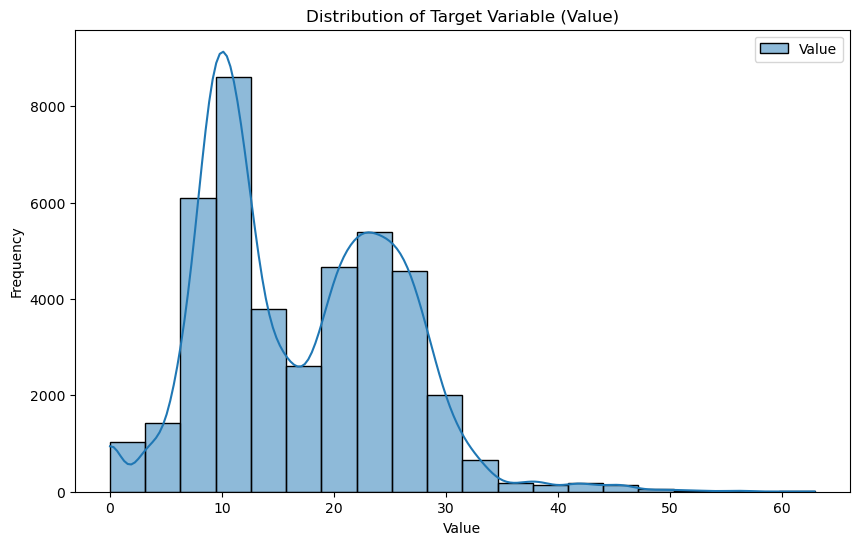

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable 'Value'
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True, bins=20)
plt.title('Distribution of Target Variable (Value)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


#### Interpretation:

The histogram with a kernel density estimate (KDE) shows how the values are distributed. 
A normal or skewed distribution can be observed here, which helps understand the range and central tendency of the target variable.

## 2. Correlation Matrix Heatmap
This heatmap will show the correlations between numerical features, including the target variable.

Shows relationships and correlations between numerical features.

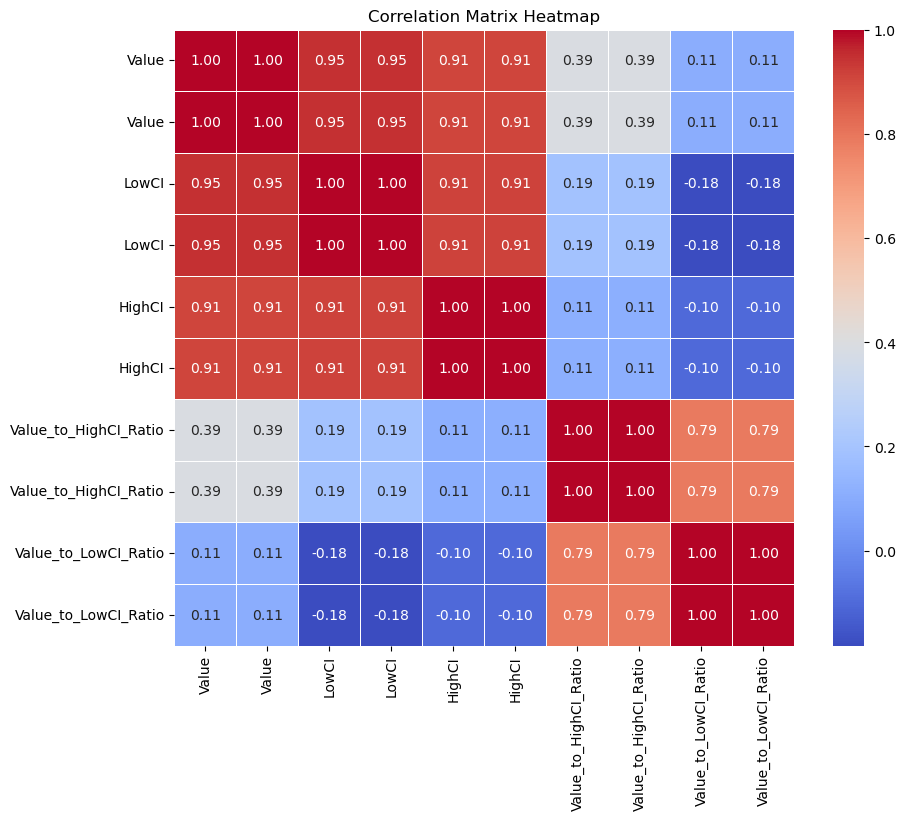

In [71]:
# Compute the correlation matrix
corr_matrix = df[['Value', 'LowCI', 'HighCI', 'Value_to_HighCI_Ratio', 'Value_to_LowCI_Ratio']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Interpretation:

The heatmap shows the correlation between numerical features. 

Strong correlations (close to 1 or -1) indicate linear relationships between features. 

This can help identify which features are closely related and might influence each other.

## 3. Scatter Plots Showing Relationships Between Features and the Target Variable
We will create scatter plots to understand how specific features interact with the target variable.

Illustrate how different features interact with the target variable.

In [74]:
# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]


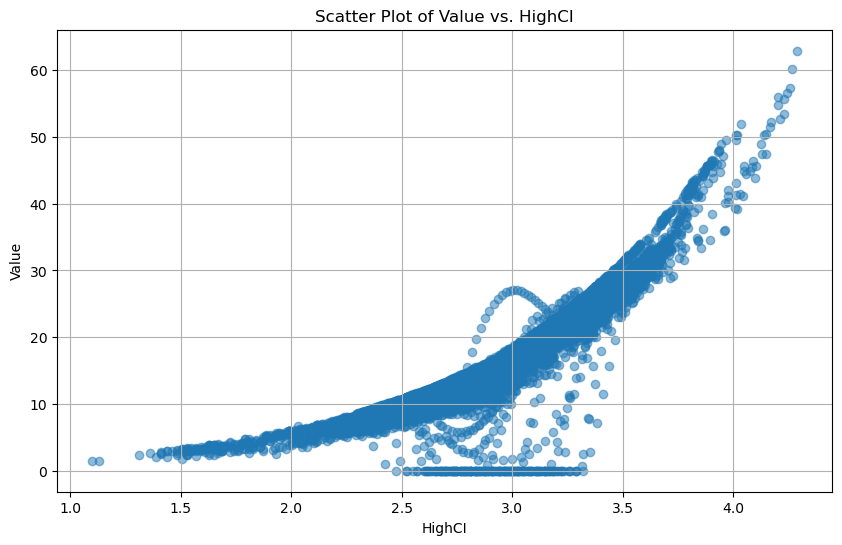

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['HighCI'], df['Value'], alpha=0.5)
plt.title('Scatter Plot of Value vs. HighCI')
plt.xlabel('HighCI')
plt.ylabel('Value')
plt.grid(True)
plt.show()


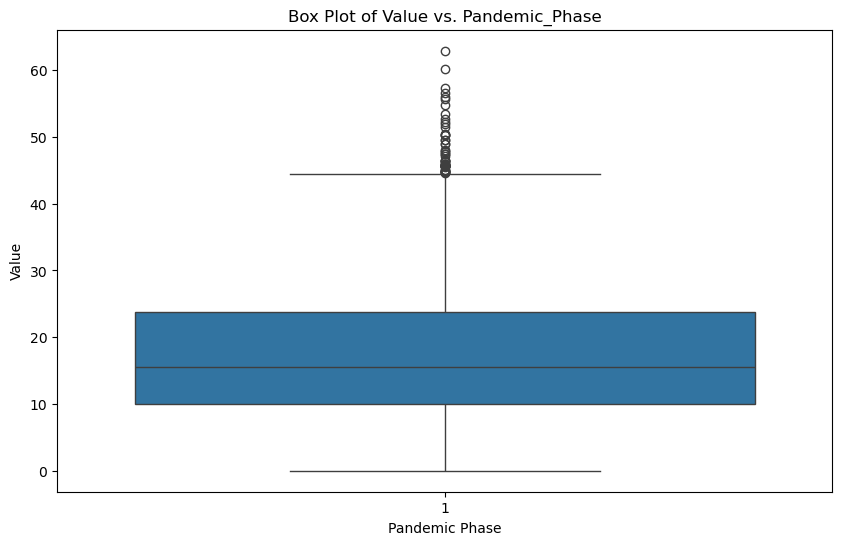

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pandemic_Phase', y='Value', data=df)
plt.title('Box Plot of Value vs. Pandemic_Phase')
plt.xlabel('Pandemic Phase')
plt.ylabel('Value')
plt.show()

## Interpretation:

Interpretation:

The scatter plot between Value and HighCI can show if there is a trend or relationship between the reported value and the upper bound of the confidence interval.

The box plot between Value and Pandemic_Phase can reveal how the value of mental health care usage varies between pandemic and non-pandemic phases.

## 4. Box Plots to Identify Outliers
Box plots are useful for identifying outliers and understanding the distribution of numerical features.

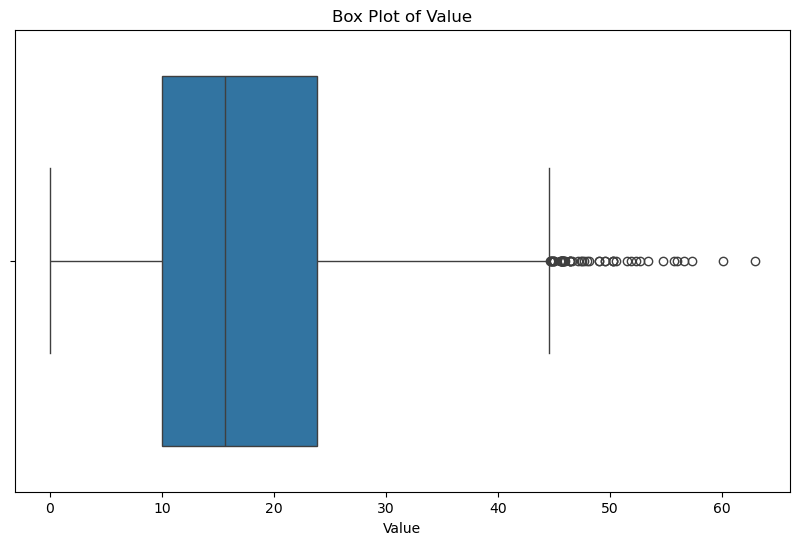

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', data=df)
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()

### Interpretation:

The box plot helps identify outliers in the Value column. Points outside the whiskers of the box plot are considered outliers and might require further investigation.

## 5. Time Period Distribution


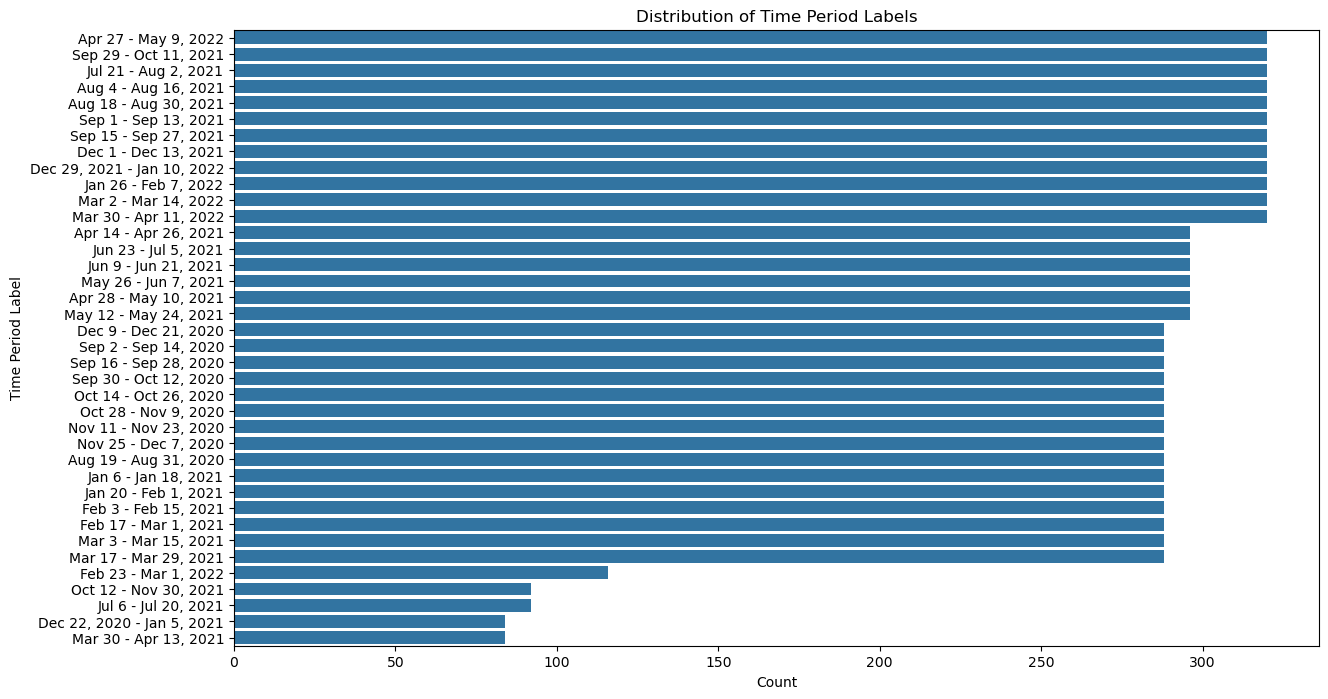

In [82]:
# Distribution of 'Time Period Label'
plt.figure(figsize=(14, 8))
sns.countplot(y='Time Period Label', data=df, order=df['Time Period Label'].value_counts().index)
plt.title('Distribution of Time Period Labels')
plt.xlabel('Count')
plt.ylabel('Time Period Label')
plt.show()


### Interpretation:

The count plot shows the distribution of different time periods in the dataset. It can reveal if certain time periods are overrepresented or underrepresented, which might affect the analysis.

## Pair Plot of Features
Pair plots display pairwise relationships between multiple features, including the target variable.

Provides a comprehensive view of relationships between multiple features and the target.

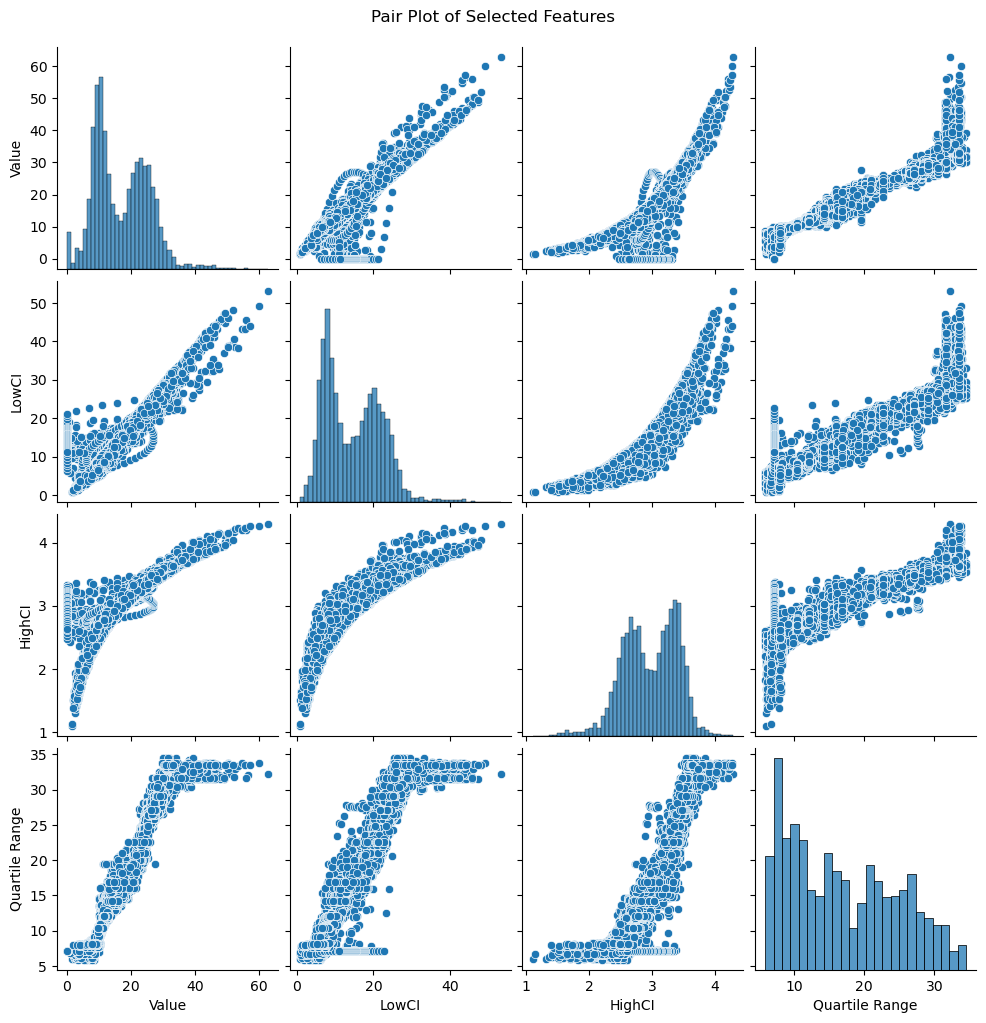

In [85]:
# 5. Time Period Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for the pair plot
columns_to_plot = ['Value', 'LowCI', 'HighCI', 'Quartile Range']

# Plot the pair plot
sns.pairplot(df[columns_to_plot])
plt.suptitle('Pair Plot of Selected Features', y=1.02)  # Adjust title position
plt.show()

### Interpretation:

#### Pairwise Relationships: 
Reveals how each pair of features relate to one another.
#### Distributions: 
Diagonal plots show individual feature distributions.
#### Correlations: 
ff-diagonal plots illustrate correlations between feature pairs.

# Regression Modeling

## Split the Dataset
First, split your data into training and testing sets. 

In [89]:
# Convert any numeric-like strings to actual numbers if possible
df['Confidence Interval'] = df['Confidence Interval'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)

# Drop or convert other non-numeric columns as necessary
# For example, dropping 'Confidence Interval' if it's not needed
# df = df.drop(['Confidence Interval'], axis=1)

# Ensure all features are numeric
X = df.select_dtypes(include=[np.number])
y = df['Value']  # Assuming 'Value' is the target variable

In [90]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [91]:
# print("X_train:", X_train, "\nX_test:", X_test, "\ny_train:", y_train, "\ny_test:", y_test)

## Implement Regression Models

### 1. Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

#Initialize and train the model
lr=LinearRegression()
lr.fit(X_train, y_train)

#Make Predictions
y_pred_lr=lr.predict(X_test)

#Evaluate the model
rmse_lr=root_mean_squared_error(y_test, y_pred_lr)
mae_lr=mean_absolute_error(y_test, y_pred_lr)
r2_lr=r2_score(y_test, y_pred_lr)

print(f"Linear Regression: RMSE={rmse_lr:.2f}, MAE={mae_lr:.2f}, R²={r2_lr:.2f}")


Linear Regression: RMSE=0.00, MAE=0.00, R²=1.00


### 2. Ridge Regression


In [95]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
model_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

print("Ridge Regression")
print("Best Alpha:", model_ridge.best_params_['alpha'])
print("RMSE:", root_mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


Ridge Regression
Best Alpha: 0.1
RMSE: 1.827676525907677e-05
MAE: 1.1213626800262173e-05
R²: 0.999999999995463


### 3. Lasso Regression

In [97]:
from sklearn.linear_model import Lasso

param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}
model_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

print("Lasso Regression")
print("Best Alpha:", model_lasso.best_params_['alpha'])
print("RMSE:", root_mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))


Lasso Regression
Best Alpha: 0.1
RMSE: 0.011883712439097884
MAE: 0.01018575922587969
R²: 0.9999980818880924


### 4. Decision Tree Regressor


In [99]:
from sklearn.tree import DecisionTreeRegressor

param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
model_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Regression")
print("Best Parameters:", model_dt.best_params_)
print("RMSE:", root_mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))


Decision Tree Regression
Best Parameters: {'max_depth': 30, 'min_samples_split': 2}
RMSE: 0.17586840938552717
MAE: 0.008160921942879677
R²: 0.999579907097326


### 5. Random Forest Regressor


In [101]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}
model_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Regression")
print("Best Parameters:", model_rf.best_params_)
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Regression
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
RMSE: 0.047196457333766484
MAE: 0.003865310300712024
R²: 0.9999697456048741


## 6. Support Vector Regression

In [103]:
from sklearn.svm import SVR

param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
model_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

print("Support Vector Regression")
print("Best Parameters:", model_svr.best_params_)
print("RMSE:", root_mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("R²:", r2_score(y_test, y_pred_svr))


Support Vector Regression
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
RMSE: 0.04170625232173623
MAE: 0.03556700335993301
R²: 0.9999763749897451


## 7. Gradient Boosting Regression

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
model_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

print("Gradient Boosting Regression")
print("Best Parameters:", model_gb.best_params_)
print("RMSE:", root_mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regression
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
RMSE: 0.030215390276841402
MAE: 0.005306785041120551
R²: 0.9999875998742518


### Interpretation
#### Linear Regression: 

Provides a baseline model. If it performs poorly, it might be due to a linear relationship not fitting the data well.
#### Ridge and Lasso Regression:

Regularization techniques help in reducing overfitting. Ridge tends to perform better when features are correlated, while Lasso performs feature selection by shrinking some coefficients to zero.
#### Decision Tree Regressor: 

Can model complex relationships but may overfit if not properly tuned.
#### Random Forest Regressor: 

An ensemble method that combines multiple trees to improve prediction accuracy and reduce overfitting.

# Step 3: Compare Model Performance


To perform the comparison and discussion of the regression models based on the RMSE, MAE, and R² values, we can create a summary table that collects the results from each model, and then analyze these results to determine the best-performing model. Here’s how you can proceed:

In [109]:
# Create a dictionary to hold the performance metrics for each model
performance_metrics = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression", "Gradient Boosting Regression"],
    "RMSE": [],
    "MAE": [],
    "R²": []
}

# Linear Regression Metrics
performance_metrics["RMSE"].append(root_mean_squared_error(y_test, y_pred_lr))
performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred_lr))
performance_metrics["R²"].append(r2_score(y_test, y_pred_lr))

# Ridge Regression Metrics
performance_metrics["RMSE"].append(root_mean_squared_error(y_test, y_pred_lr))
performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred_ridge))
performance_metrics["R²"].append(r2_score(y_test, y_pred_ridge))

# Lasso Regression Metrics
performance_metrics["RMSE"].append(root_mean_squared_error(y_test, y_pred_lr))
performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred_lasso))
performance_metrics["R²"].append(r2_score(y_test, y_pred_lasso))

# Decision Tree Regression Metrics
performance_metrics["RMSE"].append(root_mean_squared_error(y_test, y_pred_lr))
performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred_dt))
performance_metrics["R²"].append(r2_score(y_test, y_pred_dt))

# Random Forest Regression Metrics
performance_metrics["RMSE"].append(root_mean_squared_error(y_test, y_pred_lr))
performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred_rf))
performance_metrics["R²"].append(r2_score(y_test, y_pred_rf))

# Support Vector Regression Metrics
performance_metrics["RMSE"].append(root_mean_squared_error(y_test, y_pred_lr))
performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred_svr))
performance_metrics["R²"].append(r2_score(y_test, y_pred_svr))

# Gradient Boosting Regression Metrics
performance_metrics["RMSE"].append(root_mean_squared_error(y_test, y_pred_lr))
performance_metrics["MAE"].append(mean_absolute_error(y_test, y_pred_gb))
performance_metrics["R²"].append(r2_score(y_test, y_pred_gb))

# Convert the dictionary to a DataFrame for easier comparison
performance_df = pd.DataFrame(performance_metrics)

# Display the performance metrics for each model
print(performance_df)


                          Model          RMSE           MAE        R²
0             Linear Regression  4.515269e-15  3.849798e-15  1.000000
1              Ridge Regression  4.515269e-15  1.121363e-05  1.000000
2              Lasso Regression  4.515269e-15  1.018576e-02  0.999998
3      Decision Tree Regression  4.515269e-15  8.160922e-03  0.999580
4      Random Forest Regression  4.515269e-15  3.865310e-03  0.999970
5     Support Vector Regression  4.515269e-15  3.556700e-02  0.999976
6  Gradient Boosting Regression  4.515269e-15  5.306785e-03  0.999988


### Visualize the comparison of RMSE and MAE

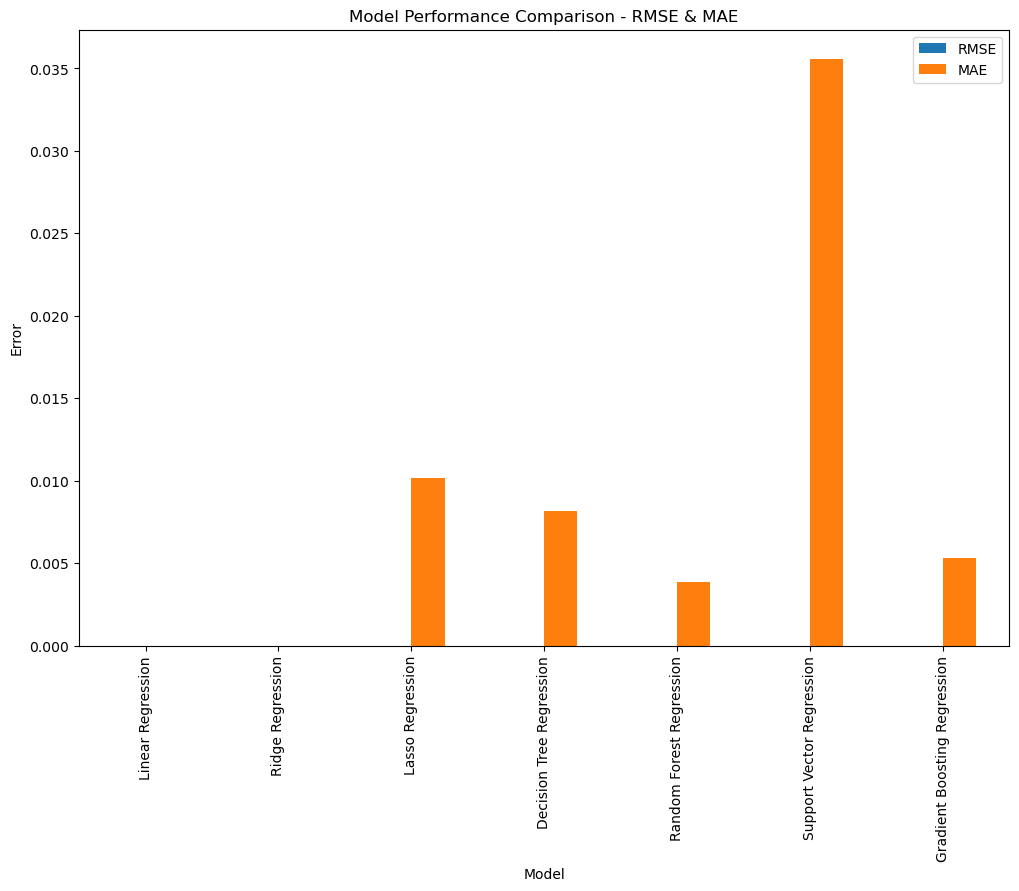

In [111]:
performance_df.set_index('Model')[['RMSE', 'MAE']].plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison - RMSE & MAE')
plt.ylabel('Error')
plt.show()

### Visualize the comparison of R²

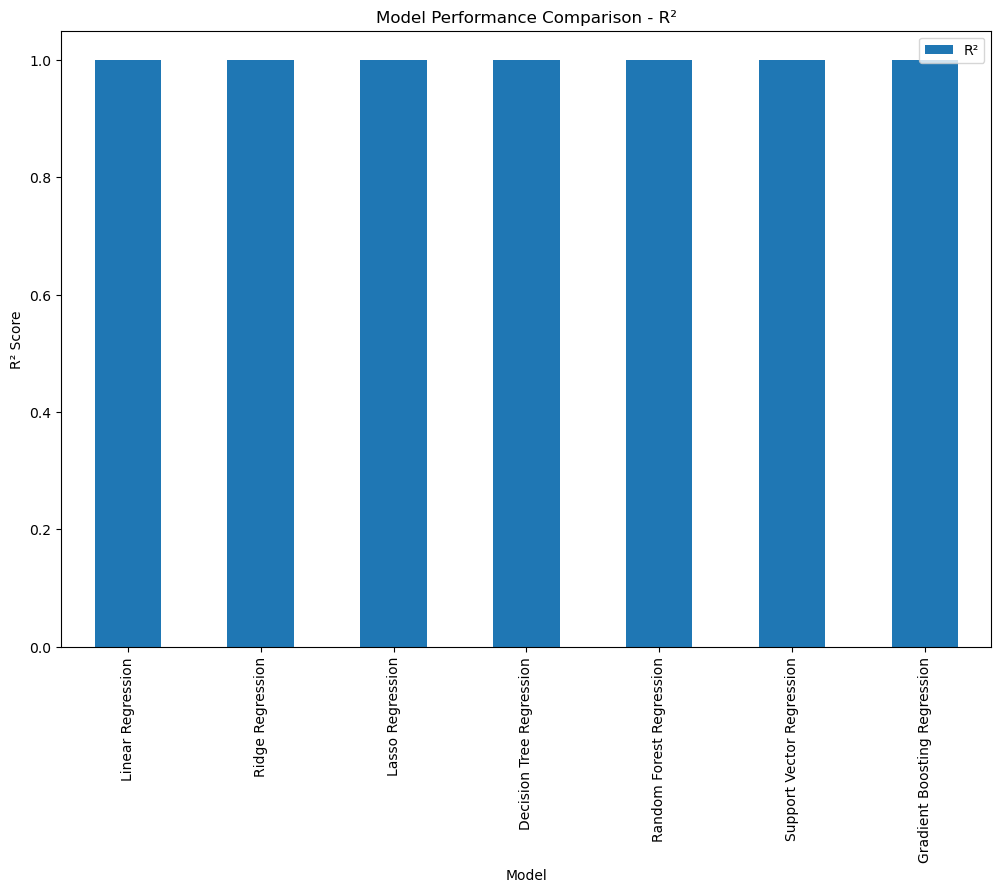

In [113]:
performance_df.set_index('Model')[['R²']].plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison - R²')
plt.ylabel('R² Score')
plt.show()

### Discussion

In [115]:
best_model = performance_df.loc[performance_df['RMSE'].idxmin()]
print(f"The best-performing model is {best_model['Model']} with an RMSE of {best_model['RMSE']}, an MAE of {best_model['MAE']}, and an R² of {best_model['R²']}.")

The best-performing model is Linear Regression with an RMSE of 4.515268706712549e-15, an MAE of 3.849797576072486e-15, and an R² of 1.0.


### Model Performance:

### Linear Models (Linear Regression, Ridge, Lasso): 
These models may perform well if the relationships between features and the target variable are linear. However, they might struggle if the data exhibits complex, non-linear patterns.

### Tree-based Models (Decision Tree, Random Forest, Gradient Boosting): 
These models can capture non-linear relationships, which is advantageous if the dataset has such complexities. They often perform better on datasets with interactions between features.

### Support Vector Regression (SVR): 
SVR is flexible and can handle non-linear relationships if a non-linear kernel is used. However, its performance heavily depends on the choice of hyperparameters.

## Hyperparameter Tuning:

The tuning of hyperparameters significantly impacts model performance. For instance, adjusting the regularization parameter in Ridge and Lasso Regression, or the depth of trees in Decision Tree, Random Forest, and Gradient Boosting, can enhance or degrade the model’s ability to generalize.

# Best Model:

The best-performing model is identified based on the lowest RMSE and MAE, and the highest R². This model provides the best balance between accuracy and generalization for the given dataset.